In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_human = pd.read_csv("survey_1_responses.csv")
df_ai = pd.read_csv("survey_2_responses.csv")
df_mixed = pd.read_csv("survey_3_responses.csv")
df_mixed_accuracy = pd.read_csv("mixed_survey_accuracy.csv")

print(len(df_human))
print(len(df_ai))
print(len(df_mixed))

31
21
27


In [5]:
df_human.columns = ["Timestamp"] + [f"art_{i}" for i in range(16)] + ["support_personal_use", "support_commercial_use", "use_to_create_art"]
df_ai.columns = ["Timestamp"] + [f"art_{i}" for i in range(16)] + ["support_personal_use", "support_commercial_use", "use_to_create_art"]
personal_sentiment_human = df_human[["support_personal_use", "support_commercial_use", "use_to_create_art"]]
personal_sentiment_ai = df_ai[["support_personal_use", "support_commercial_use", "use_to_create_art"]]
personal_sentiment_mixed = df_mixed[["support_personal_use", "support_commercial_use", "use_to_create_art"]]
personal_sentiment_all = pd.concat([personal_sentiment_human, personal_sentiment_ai, personal_sentiment_mixed])

In [6]:
df_mixed_ratings_only = df_mixed[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_mixed_ratings_only = round(pd.concat([df_mixed_ratings_only, df_human[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]), 3)

df_human_mean = df_human[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_human_mean = round(pd.concat([df_human_mean, df_human[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]).mean(), 3)

df_ai_mean = df_ai[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_ai_mean = round(pd.concat([df_ai_mean, df_ai[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]).mean(), 3)

df_mixed_mean = df_mixed[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_mixed_mean = round(pd.concat([df_mixed_mean, df_mixed[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]).mean(), 3)

In [7]:
df_human_stderr = df_human[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_human_stderr = round(pd.concat([df_human_stderr, df_human[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]).std() / np.sqrt(df_human.shape[0]), 3)

df_ai_stderr = df_ai[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_ai_stderr = round(pd.concat([df_ai_stderr, df_ai[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]).std() / np.sqrt(df_ai.shape[0]), 3)

df_mixed_stderr = df_mixed[['art_0', 'art_2', 'art_4', 'art_6','art_8', 'art_10', 'art_12', 'art_14']]
df_mixed_stderr = round(pd.concat([df_mixed_stderr, df_mixed[['art_1', 'art_3', 'art_5', 'art_7','art_9', 'art_11', 'art_13', 'art_15']]]).std() / np.sqrt(df_mixed.shape[0]), 3)

#print(df_human_stderr)
#print(df_ai_stderr)
print("Human Survey Standard Error Range: " + str(min(df_human_stderr)) + "–" + str(max(df_human_stderr)))
print("AI Survey Standard Error Range: " + str(min(df_ai_stderr)) + "–" + str(max(df_ai_stderr)))
print("Mixed Survey Standard Error Range: " + str(min(df_mixed_stderr)) + "–" + str(max(df_mixed_stderr)))

human_ai_mean_diff = round(df_human_mean - df_ai_mean, 3)

avg_human_ai_mean_diff = human_ai_mean_diff.mean()


human_ai_diff_comparison = pd.DataFrame({'Human Mean': df_human_mean, 'Human SE': df_human_stderr, 'AI Mean': df_ai_mean, 'AI SE': df_ai_stderr, 'Mean Diff': human_ai_mean_diff})
df_mixed_mean_stderr = pd.DataFrame({'Mixed Mean': df_mixed_mean, 'Mixed SE': df_mixed_stderr})

Human Survey Standard Error Range: 0.16–0.238
AI Survey Standard Error Range: 0.184–0.279
Mixed Survey Standard Error Range: 0.138–0.236


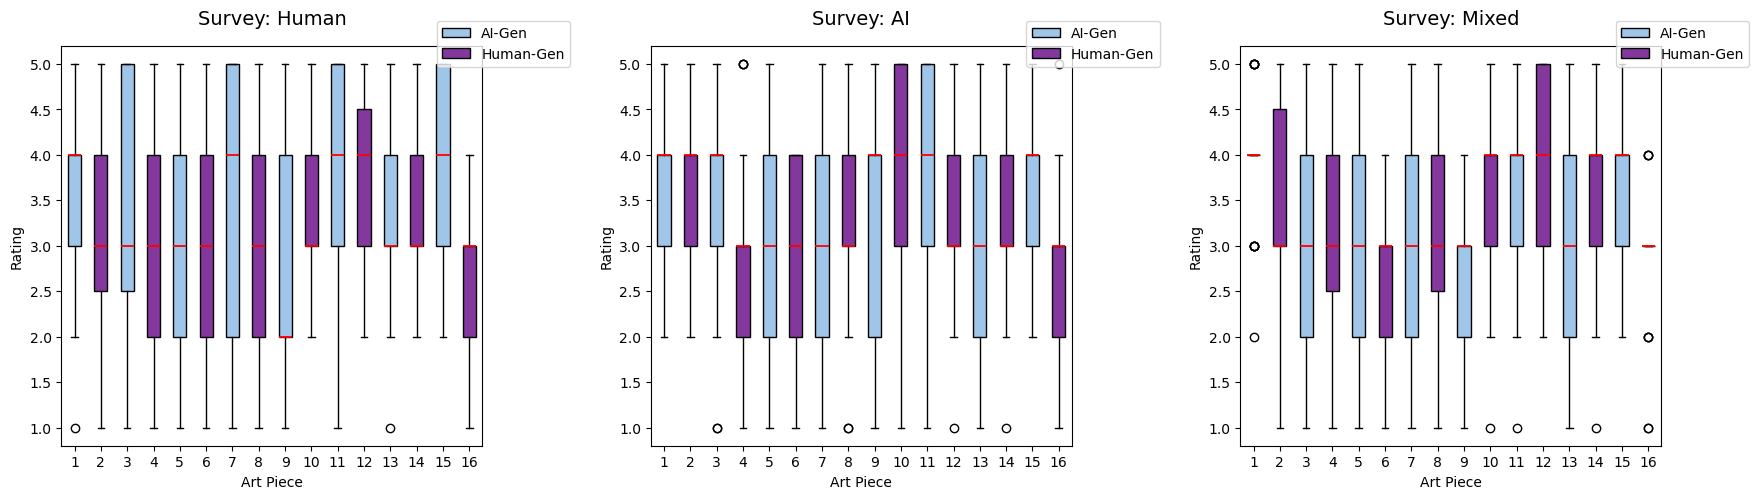

In [26]:
#Boxplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))  
medianprops = dict(linestyle='-', linewidth=1.3)

bplot1 = ax1.boxplot(df_human.iloc[:, 1:17], patch_artist = True, medianprops=medianprops)
ax1.set_title("Survey: Human", fontsize=14, y=1.05, pad=1)
ax1.set_xlabel('Art Piece')
ax1.set_ylabel('Rating')
count = 0
for patch in bplot1['boxes']:
    if count % 2 == 0:
        patch.set_facecolor('#9fc5e8')
    else:
        patch.set_facecolor('#84379c')
    count += 1
for median in bplot1['medians']:
    median.set_color('red')
ax1.legend([bplot1["boxes"][0], bplot1["boxes"][1]], ['AI-Gen', 'Human-Gen'], loc='upper right', bbox_to_anchor=(1.225, 1.08))

bplot2 = ax2.boxplot(df_ai.iloc[:, 1:17], patch_artist = True, medianprops=medianprops)
ax2.set_title('Survey: AI', fontsize=14, y=1.05, pad=1)
ax2.set_xlabel('Art Piece')
ax2.set_ylabel('Rating')
for patch in bplot2['boxes']:
    if count % 2 == 0:
        patch.set_facecolor('#9fc5e8')
    else:
        patch.set_facecolor('#84379c')
    count += 1
for median in bplot2['medians']:
    median.set_color('red')
ax2.legend([bplot1["boxes"][0], bplot2["boxes"][1]], ['AI-Gen', 'Human-Gen'], loc='upper right', bbox_to_anchor=(1.225, 1.08))

bplot3 = ax3.boxplot(df_mixed[[f"art_{i}" for i in range(16)]], patch_artist = True, medianprops=medianprops)
ax3.set_title('Survey: Mixed', fontsize=14, y=1.05, pad=1)
ax3.set_xlabel('Art Piece')
ax3.set_ylabel('Rating')
for patch in bplot3['boxes']:
    if count % 2 == 0:
        patch.set_facecolor('#9fc5e8')
    else:
        patch.set_facecolor('#84379c')
    count += 1
for median in bplot3['medians']:
    median.set_color('red')
ax3.legend([bplot1["boxes"][0], bplot3["boxes"][1]], ['AI-Gen', 'Human-Gen'], loc='upper right', bbox_to_anchor=(1.225, 1.08))

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
count = 0

plt.savefig('bplots.png', bbox_inches = 'tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

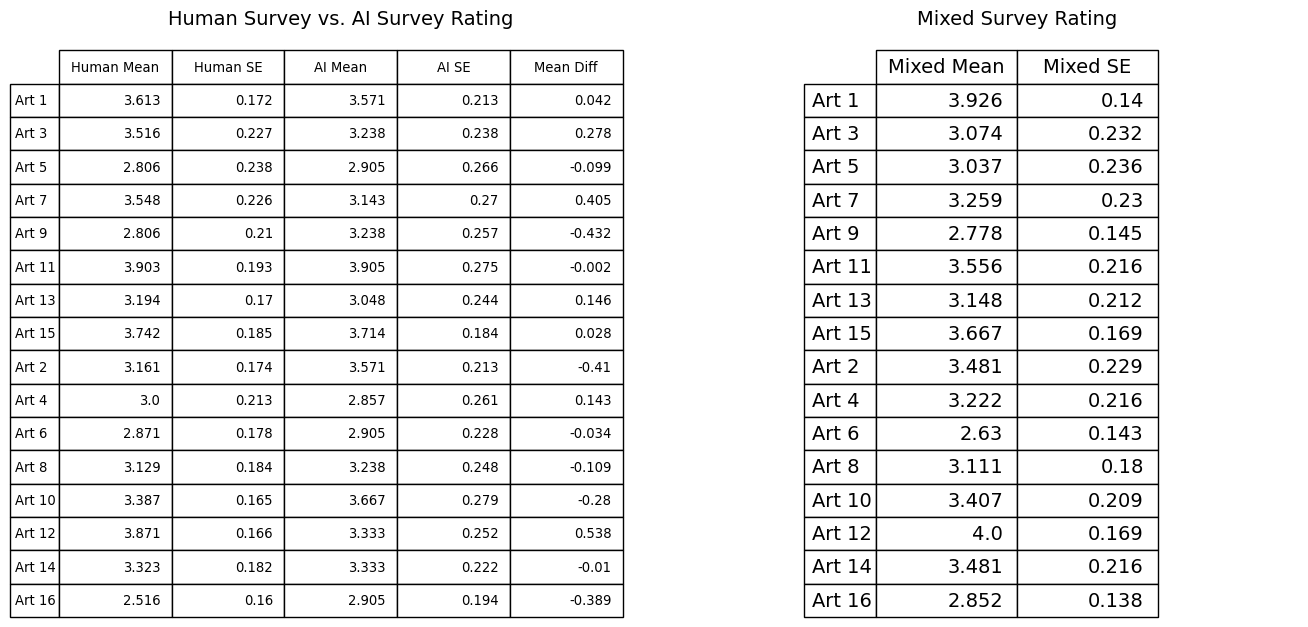

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))  
ax1.set_title("Human Survey vs. AI Survey Rating", fontsize=14, y=1.3, pad=1)
table1 = ax1.table(cellText=human_ai_diff_comparison.values, colLabels=human_ai_diff_comparison.columns,
        rowLabels=["Art 1","Art 3","Art 5", "Art 7", "Art 9", "Art 11", "Art 13", "Art 15", "Art 2", "Art 4", "Art 6", "Art 8", "Art 10", "Art 12", "Art 14", "Art 16"],
        loc="center")
ax1.axis('tight')
ax1.axis('off')
table1.auto_set_font_size(False)
table1.set_fontsize(9.5)
table1.scale(1,2)


ax2.set_title("Mixed Survey Rating", fontsize=14, y=1.3, pad=1)
table2 = ax2.table(cellText=df_mixed_mean_stderr.values, colLabels=df_mixed_mean_stderr.columns,
        rowLabels=["Art 1","Art 3","Art 5", "Art 7", "Art 9", "Art 11", "Art 13", "Art 15", "Art 2", "Art 4", "Art 6", "Art 8", "Art 10", "Art 12", "Art 14", "Art 16"],
        loc="center")
ax2.axis('tight')
ax2.axis('off')
table2.set_fontsize(15)
table2.scale(0.5,2)

plt.savefig('comp_tables.png', bbox_inches = 'tight')
plt.show

In [10]:
def barPerc(df,xVar,ax):
    numX=len([x for x in df[xVar].unique() if x==x])
    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

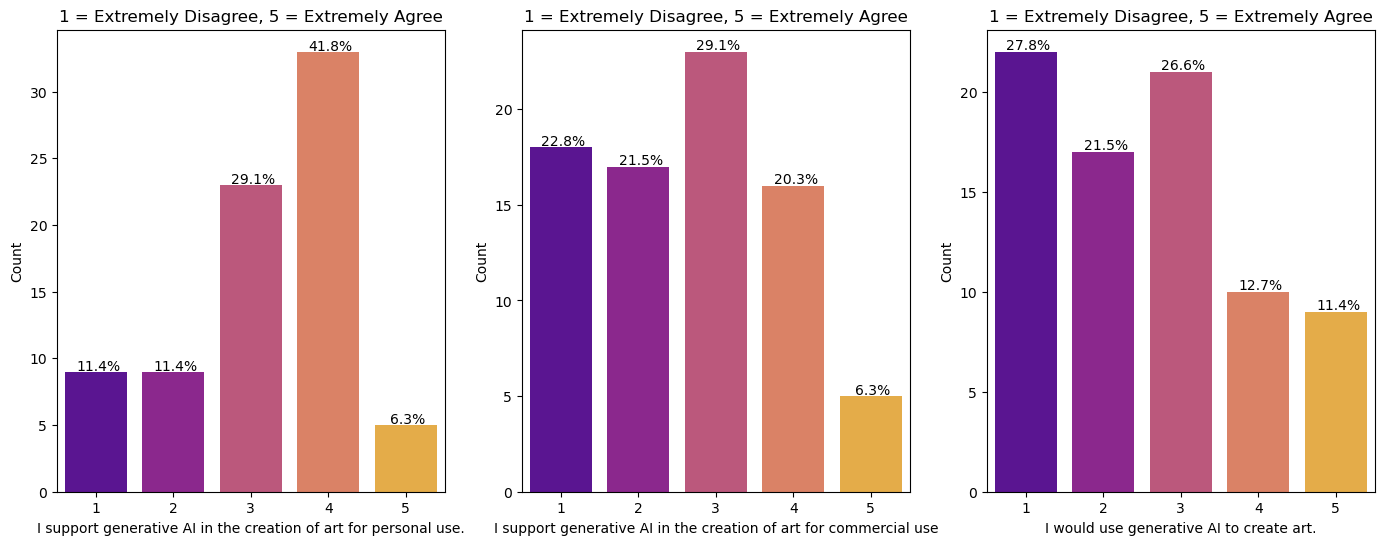

In [11]:
#bar plot for personal sentiment questions
support_personal_use = personal_sentiment_all.iloc[:, 0]
support_commercial_use = personal_sentiment_all.iloc[:, 1]
use_to_create =personal_sentiment_all.iloc[:, 2]

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17,6))  

# creating the bar plot
sns.countplot(data=personal_sentiment_all, x="support_personal_use", palette='plasma', ax=ax1, dodge=False)
sns.countplot(data=personal_sentiment_all, x="support_commercial_use", palette='plasma', ax=ax2, dodge=False)
sns.countplot(data=personal_sentiment_all, x="use_to_create_art", palette='plasma', ax=ax3, dodge=False)
ax1.set(xlabel = 'I support generative AI in the creation of art for personal use.', ylabel = 'Count', title='1 = Extremely Disagree, 5 = Extremely Agree')   
ax2.set(xlabel = 'I support generative AI in the creation of art for commercial use', ylabel = 'Count', title='1 = Extremely Disagree, 5 = Extremely Agree') 
ax3.set(xlabel = 'I would use generative AI to create art.', ylabel = 'Count', title='1 = Extremely Disagree, 5 = Extremely Agree') 
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_sentiment_all))
    x = p.get_x() + p.get_width() - 0.37
    y = p.get_height() + 0.1
    ax1.annotate(percentage, (x, y),ha='center')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_sentiment_all))
    x = p.get_x() + p.get_width() - 0.37
    y = p.get_height() + 0.1
    ax2.annotate(percentage, (x, y),ha='center')
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(personal_sentiment_all))
    x = p.get_x() + p.get_width() - 0.37
    y = p.get_height() + 0.1
    ax3.annotate(percentage, (x, y),ha='center')
plt.show()

0.6775
0.512


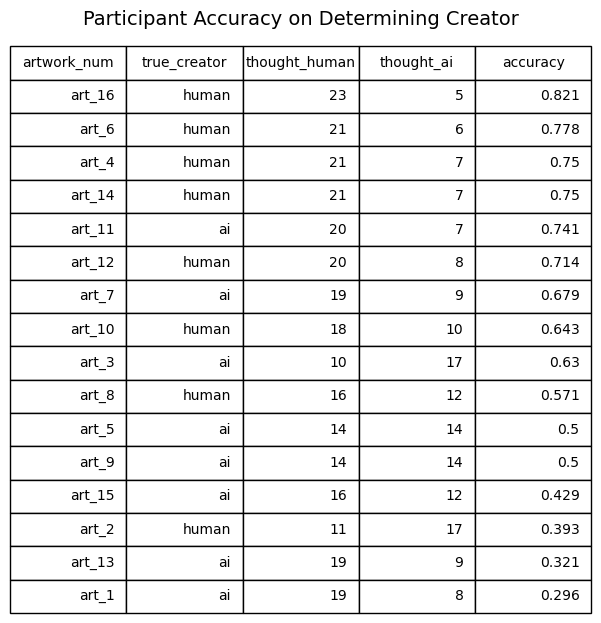

In [12]:
sorted_accuracy_df = df_mixed_accuracy.sort_values(by=["accuracy"], ascending=False)
#display(sorted_accuracy_df)

#accuracy table
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 0.2))  
ax.set_title("Participant Accuracy on Determining Creator", fontsize=14, y=1.3, pad=1)
table = ax.table(cellText=sorted_accuracy_df.values, colLabels=sorted_accuracy_df.columns)
ax.axis('tight')
ax.axis('off')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.show
plt.savefig("accuracy_table.png")

mean_accuracy = df_mixed_accuracy['accuracy'].mean()
#print(mean_accuracy)

human_art_accuracy = df_mixed_accuracy[df_mixed_accuracy["true_creator"] == "human"]
ai_art_accuracy = df_mixed_accuracy[df_mixed_accuracy["true_creator"] == "ai"]

human_mean_accuracy = human_art_accuracy["accuracy"].mean()
print(human_mean_accuracy)

ai_mean_accuracy = ai_art_accuracy["accuracy"].mean()
print(ai_mean_accuracy)